# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Parameter Estimation<br>
Section 2: Probabilities of Interest

##  Section 0: Preparing data

In [23]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

In [24]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [38]:
data = read.csv(file = "data/EVERGREEN_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [39]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 46

Check number of years in the data set.

In [40]:
data$YEAR[nrow(data)]-firstYear

[1] 52

In [41]:
table(data$MONTH)


 1  2  3  4  5  6  7  8  9 10 11 12 
53 53 53 53 53 53 53 53 53 53 53 53 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [42]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Parameter Estimation

In [43]:
options(repr.plot.width=9, repr.plot.height=8) #reduces the plot sizes

In [44]:
mleGamma = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mle")
   mleGamma[i,1] = gamma1$estimate[1]
   mleGamma[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma[i,3] = gof$ks
   mleGamma[i,4] = gof$kstest
   mleGamma[i,5] = gof$cvm
   mleGamma[i,6] = gof$cvmtest
   mleGamma[i,7] = gof$ad
   mleGamma[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [45]:
mleExp = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mle")
   mleExp[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp[i,2] = gof$ks
   mleExp[i,3] = gof$kstest
   mleExp[i,4] = gof$cvm
   mleExp[i,5] = gof$cvmtest
   mleExp[i,6] = gof$ad
   mleExp[i,7] = gof$adtest
}

mleExp["mean"] = 1/mleExp$theta
mleExp["square"] = mleExp$theta^2 
mleExp["var"] = 1/mleExp$square
mleExp["sd"] = sqrt(mleExp$var)

In [46]:
mleWB = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")
   mleWB[i,1] = WB1$estimate[1]
   mleWB[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB[i,3] = gof$ks
   mleWB[i,4] = gof$kstest
   mleWB[i,5] = gof$cvm
   mleWB[i,6] = gof$cvmtest
   mleWB[i,7] = gof$ad
   mleWB[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [47]:
which(mleWB$KStest=="rejected")

integer(0)

In [48]:
table(mleWB$KStest)
table(mleExp$KStest)
table(mleGamma$KStest)


not rejected 
          44 


not rejected     rejected 
          10           34 


not rejected 
          44 

In [49]:
which(mleGamma$KStest=="rejected")

integer(0)

In [50]:
which(mleExp$KStest=="rejected")

[1]  1  2  3  4  5  6  7 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
[26] 36 37 38 39 40 41 42 43 44

In [51]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
1.251003,0.008698314,0.10891072,not rejected,0.3103006,rejected,2.0625315,rejected,114.96481,143.8213,16534.39,128.5861
1.266897,0.008416959,0.11706474,not rejected,0.3299521,rejected,2.2218374,rejected,118.80775,150.5171,17882.60,133.7259
1.694246,0.011020722,0.07668986,not rejected,0.1186088,not rejected,0.7498934,not rejected,90.73815,153.7327,13949.42,118.1077
1.749939,0.011064360,0.08802200,not rejected,0.2087449,rejected,1.1536578,rejected,90.38028,158.1600,14294.54,119.5598
1.723695,0.010571996,0.09304209,not rejected,0.1550119,rejected,0.8987221,rejected,94.58952,163.0435,15422.20,124.1862
1.689992,0.010158564,0.08569737,not rejected,0.1013708,not rejected,0.6046450,not rejected,98.43911,166.3613,16376.46,127.9705


In [52]:
head(mleExp)

theta,KS,KStest,CvM,CvMtest,AD,ADtest,mean,square,var,sd
0.006952153,0.1565358,rejected,0.6555035,rejected,3.833047,rejected,143.8403,4.833243e-05,20690.04,143.8403
0.006644725,0.1670687,rejected,0.6798898,rejected,4.003104,rejected,150.4953,4.415236e-05,22648.84,150.4953
0.006506141,0.1536210,rejected,0.6583862,rejected,3.815963,rejected,153.7009,4.232987e-05,23623.98,153.7009
0.006322382,0.1574944,rejected,0.6989309,rejected,4.104749,rejected,158.1682,3.997252e-05,25017.19,158.1682
0.006134266,0.1518525,rejected,0.6212355,rejected,3.709109,rejected,163.0187,3.762922e-05,26575.09,163.0187
0.006008198,0.1387032,rejected,0.5395451,rejected,3.261619,rejected,166.4393,3.609844e-05,27702.02,166.4393


In [53]:
trueEst = NULL
for(i in 1:nrow(mleExp)){
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"plot")
    }
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"exp")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"gamma")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"fail")
    }
}

In [54]:
table(trueEst)
print(table(mleWB$KStest))

trueEst
gamma  plot 
   34    10 


not rejected 
          44 


In [55]:
mleGamma[which(mleWB$KStest=="rejected"),"KStest"] == "not rejected"

logical(0)

In [56]:
mleExp[which(mleWB$KStest=="rejected"),"KStest"] == "not rejected"

logical(0)

In [57]:
which(mleWB$KStest=="rejected")

integer(0)

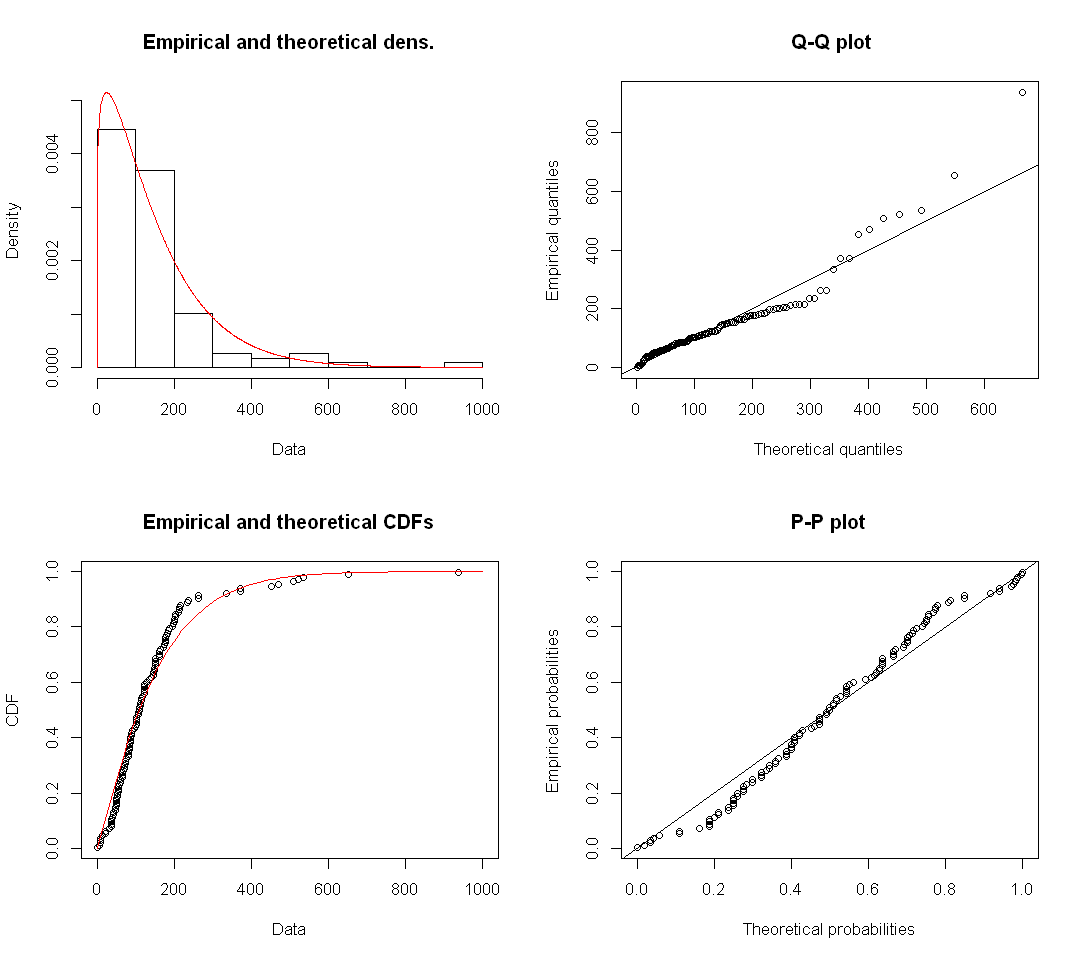

In [58]:
testDist = na.omit(max_PRCP[,1])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

plot(fitdist(as.vector(testDist),"weibull",method = "mle"))

In [59]:
mleGamma[1,"KStest"];mleExp[1,"KStest"];mleWB[1,"KStest"]

[1] "not rejected"

[1] "rejected"

[1] "not rejected"

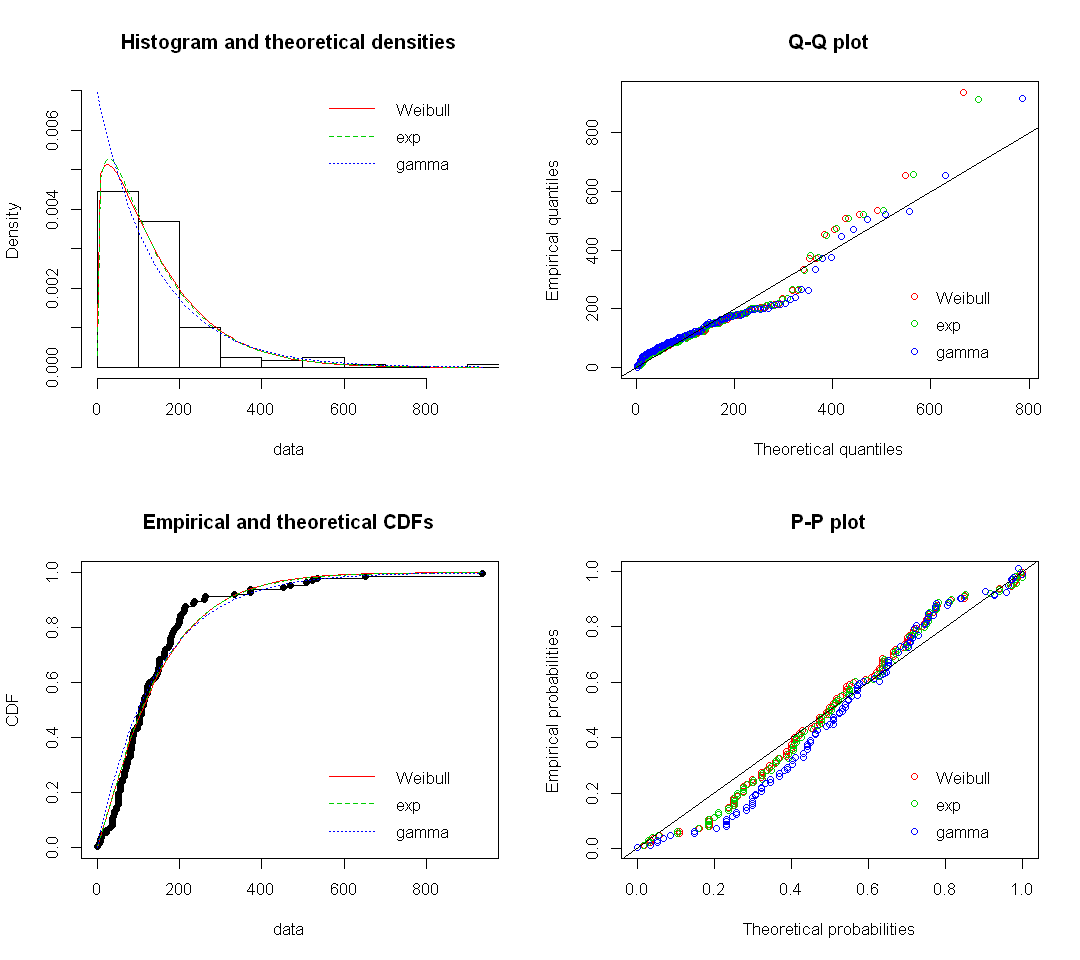

In [60]:
testDist = na.omit(max_PRCP[,1])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

In [61]:
mleGamma[2,"KStest"];mleExp[2,"KStest"];mleWB[2,"KStest"]

[1] "not rejected"

[1] "rejected"

[1] "not rejected"

In [62]:
mleGamma[3,"KStest"];mleExp[3,"KStest"];mleWB[3,"KStest"]

[1] "not rejected"

[1] "rejected"

[1] "not rejected"

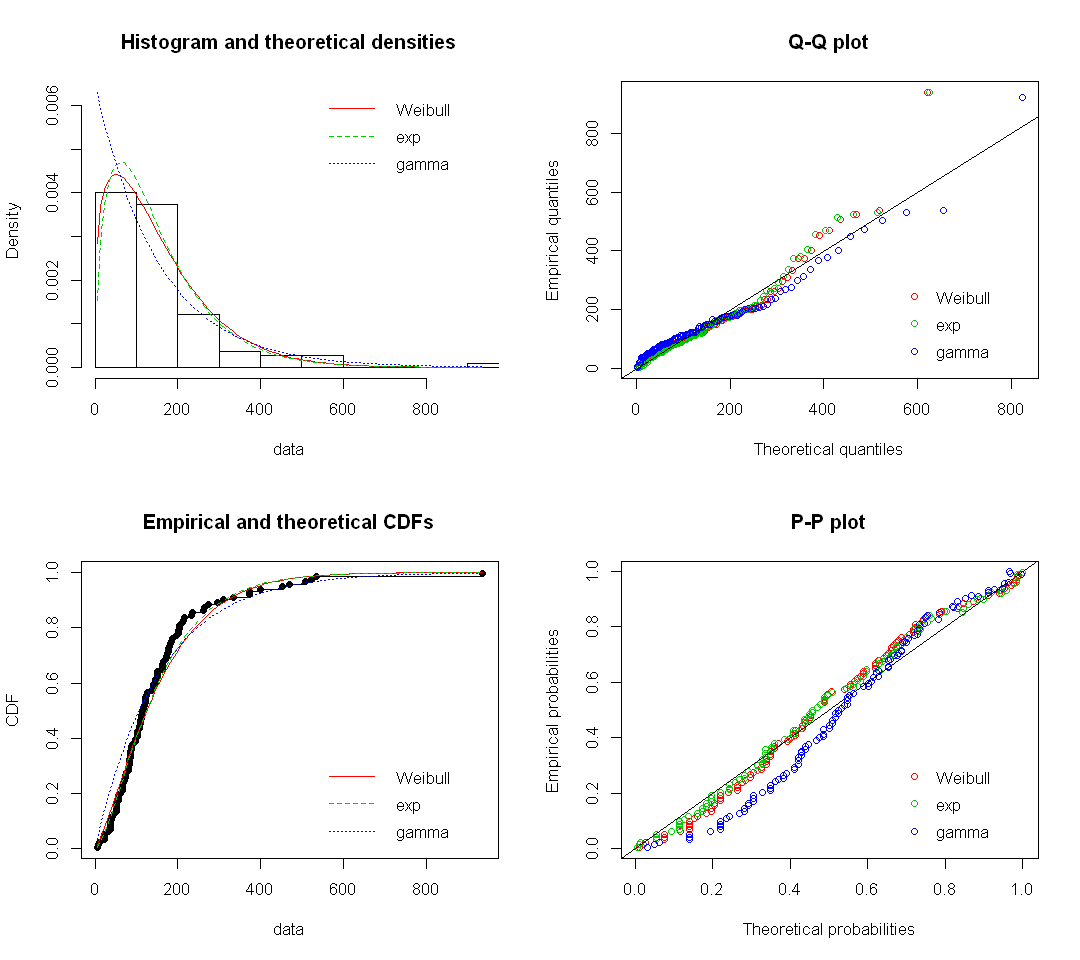

In [63]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

In [64]:
mleGamma[45,"KStest"];mleExp[45,"KStest"];mleWB[45,"KStest"]

[1] NA

[1] NA

[1] NA

In [65]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

ERROR: Error in `[.data.frame`(max_PRCP, , 45): undefined columns selected


Tried failed fits with normal distribution

In [66]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

ERROR: Error in `[.data.frame`(max_PRCP, , 45): undefined columns selected


Try good fits with normal distribution

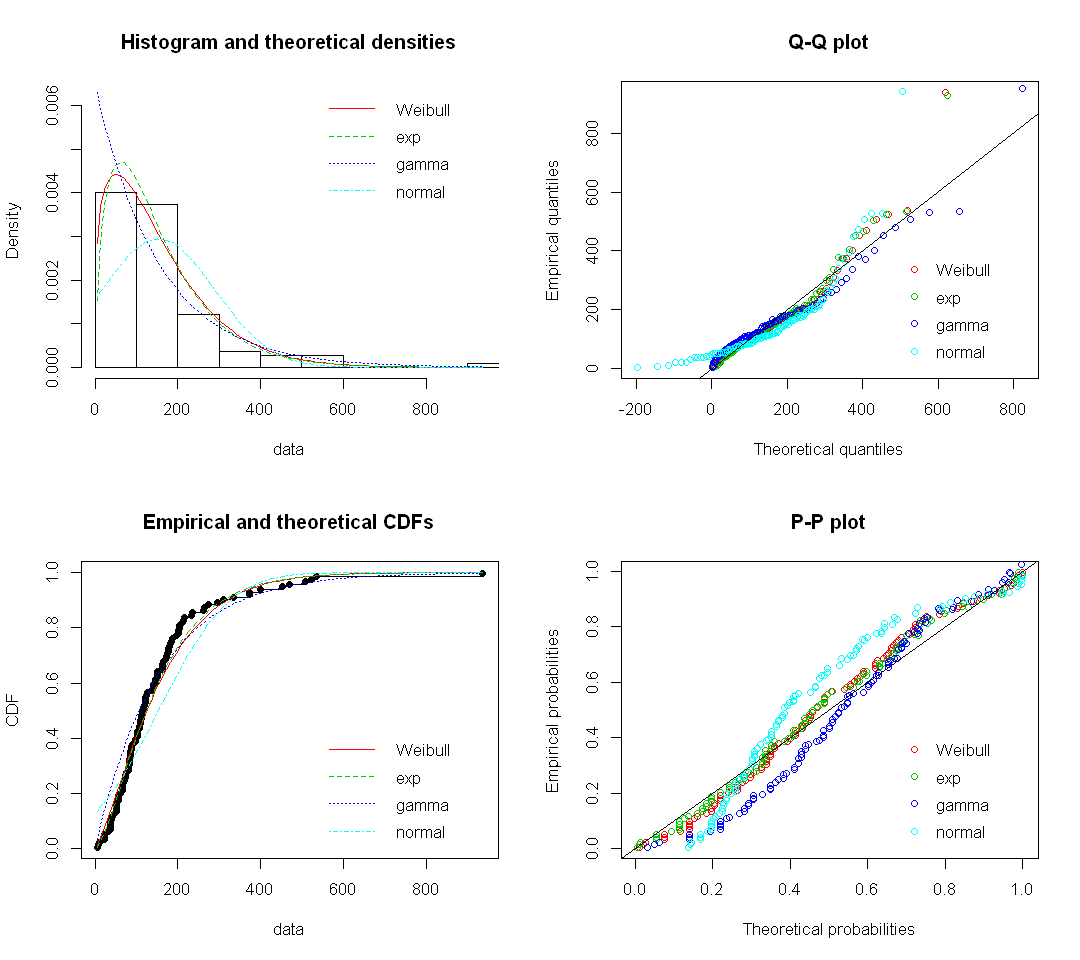

In [67]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

In [68]:
which(trueEst=="fail")

integer(0)

In [69]:
which(trueEst=="plot")

[1]  8  9 10 11 12 13 14 15 16 17

In [70]:
mleWB2 = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {
    
    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }
    
   WB1 = fitdist(as.vector(testDist),"weibull",method = "mge", gof="ADR")
   mleWB2[i,1] = WB1$estimate[1]
   mleWB2[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB2[i,3] = gof$ks
   mleWB2[i,4] = gof$kstest
   mleWB2[i,5] = gof$cvm
   mleWB2[i,6] = gof$cvmtest
   mleWB2[i,7] = gof$ad
   mleWB2[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [71]:
table(mleWB2[,4])
table(mleWB[,4])


not rejected 
          44 


not rejected 
          44 

In [72]:
mleGamma2 = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mge", gof="ADR")
   mleGamma2[i,1] = gamma1$estimate[1]
   mleGamma2[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma2[i,3] = gof$ks
   mleGamma2[i,4] = gof$kstest
   mleGamma2[i,5] = gof$cvm
   mleGamma2[i,6] = gof$cvmtest
   mleGamma2[i,7] = gof$ad
   mleGamma2[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [73]:
table(mleGamma2[,4])


not rejected 
          44 

In [74]:
table(mleGamma[,4])


not rejected 
          44 

In [75]:
mleExp2 = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mge",gof="ADR")
   mleExp2[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp2[i,2] = gof$ks
   mleExp2[i,3] = gof$kstest
   mleExp2[i,4] = gof$cvm
   mleExp2[i,5] = gof$cvmtest
   mleExp2[i,6] = gof$ad
   mleExp2[i,7] = gof$adtest
}

mleExp2["mean"] = 1/mleExp2$theta
mleExp2["square"] = mleExp2$theta^2 
mleExp2["var"] = 1/mleExp2$square
mleExp2["sd"] = sqrt(mleExp2$var)

In [76]:
table(mleExp2[,3])
table(mleExp[,3])


not rejected     rejected 
          13           31 


not rejected     rejected 
          10           34 

In [77]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

ERROR: Error in `[.data.frame`(max_PRCP, , 45): undefined columns selected


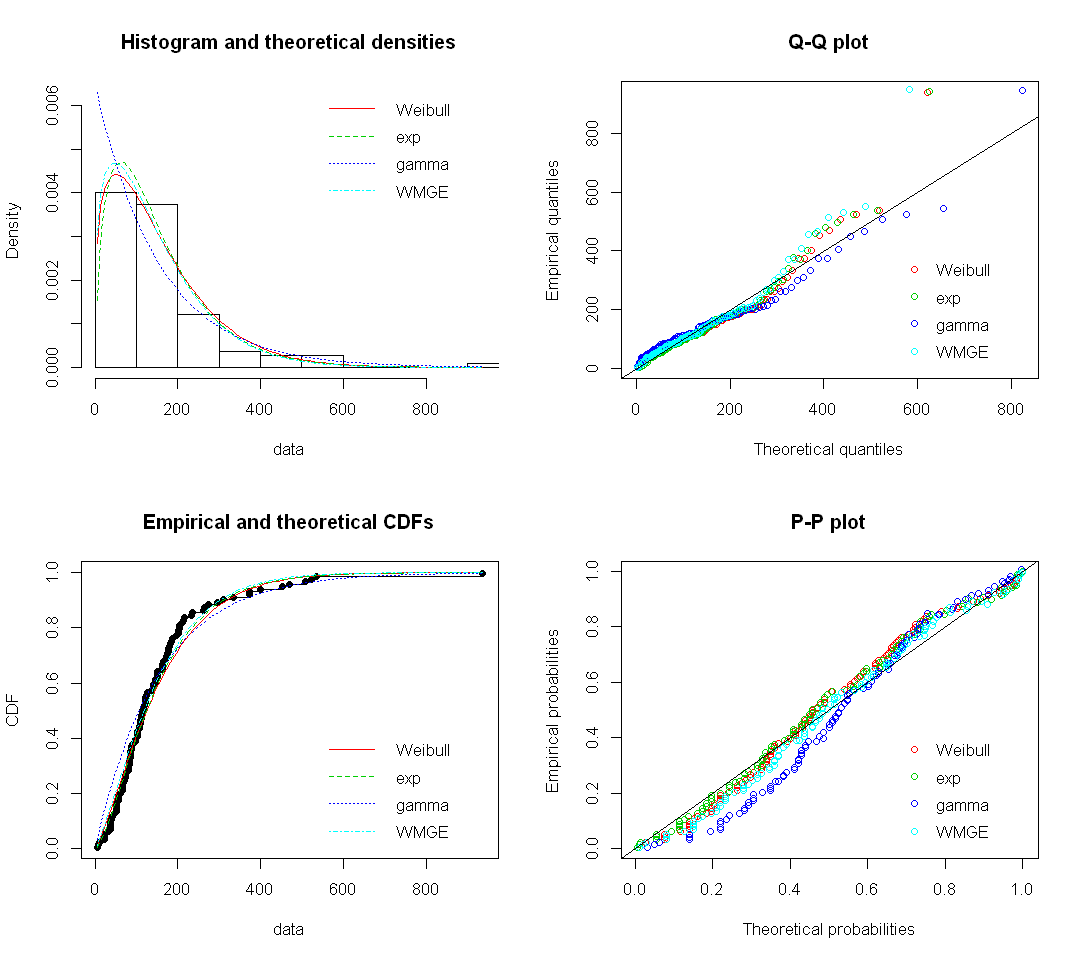

In [78]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

In [79]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

ERROR: Error in `[.data.frame`(max_PRCP, , 45): undefined columns selected


YET AGAIN, but this time with gamma MGE as well.

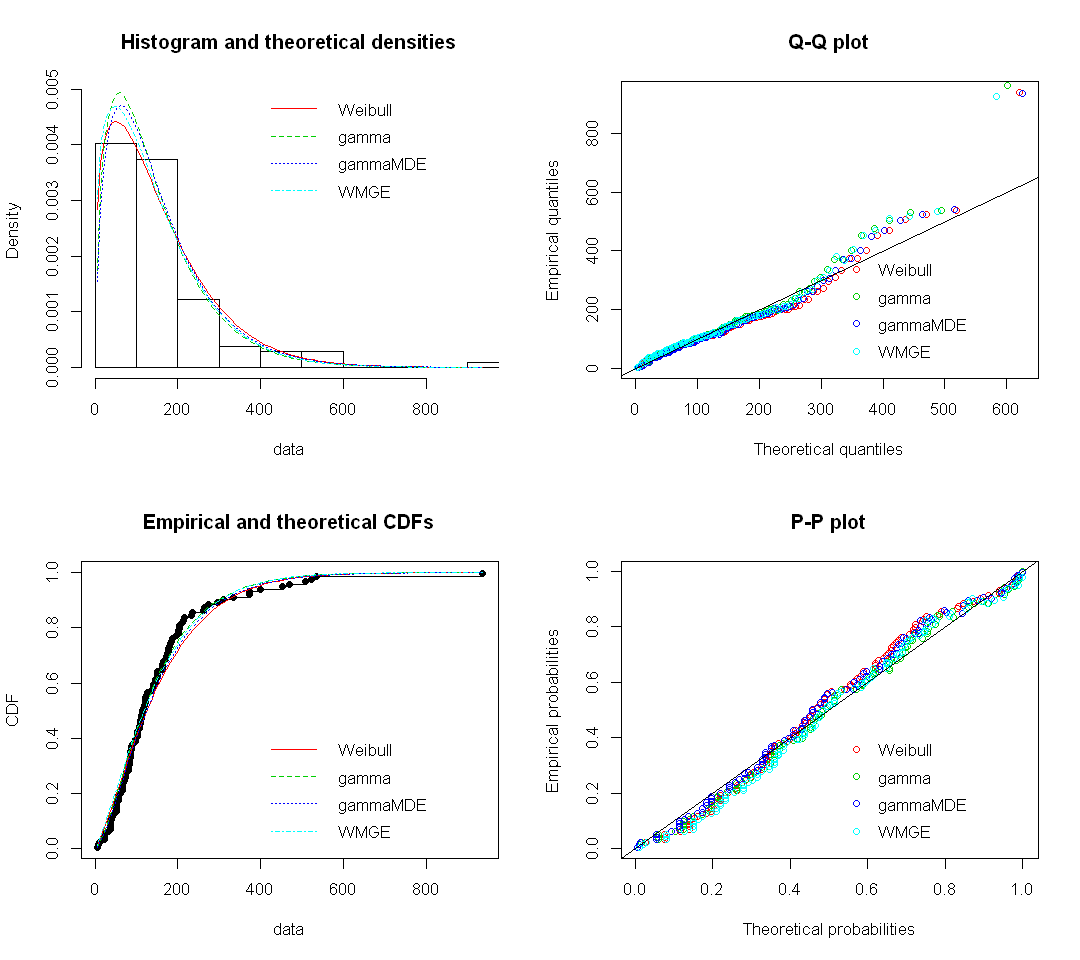

In [80]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "gamma", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mge", gof="ADR")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "gamma", "gammaMDE","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

# Probabilities of Interest 

1 inch of rain approx 25.4mm, 2 inch approx 50.8, 3 inch approx 76.2mm.

Parameter estimates for frequentist probability checks are found in mleGamma2 (using maximum goodness of fit with ADR distance for right tailed data).

probability of seeing or exceeding 1 inch of rain in a 24 hour day

In [97]:
1-pgamma(254, mleGamma2[1,1], mleGamma[1,2])

[1] 0.2468992

In [98]:
1-pgamma(508, mleGamma2[1,1], mleGamma[1,2])

[1] 0.03749357

In [99]:
1-pgamma(762, mleGamma2[1,1], mleGamma[1,2])

[1] 0.005075357

In [100]:
oneInch = NULL
twoInch = NULL
threeInch = NULL
for(i in 1:nrow(mleGamma2)){
    oneInch = c(oneInch,1-pgamma(254,mleGamma2[i,1],mleGamma2[i,2]))
    twoInch = c(twoInch,1-pgamma(508,mleGamma2[i,1],mleGamma2[i,2]))
    threeInch = c(threeInch,1-pgamma(762,mleGamma2[i,1],mleGamma2[i,2]))
}

In [101]:
length(oneInch)

[1] 44

In [102]:
starter = firstYear+9

In [103]:
oneInchTS = ts(oneInch, start=starter)
twoInchTS = ts(twoInch, start=starter)
threeInchTS = ts(threeInch, start=starter)

In [104]:
options(repr.plot.width=7,repr.plot.height=5) #reduces the plot sizes

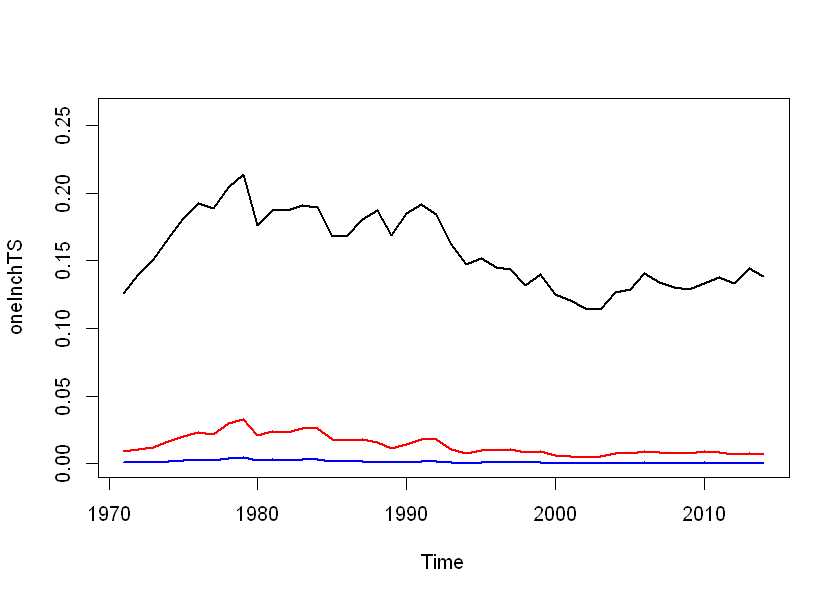

In [105]:
plot(oneInchTS, ylim=c(0,.26), lwd=2)
lines(twoInchTS, col=2, lwd=2)
lines(threeInchTS, col=4, lwd=2)

In [106]:
rollSmall = ts(runmean(oneInchTS,15),start=starter)
rollSmall2 = ts(runmean(oneInchTS,30),start=starter)
rollSmall3 = ts(runmean(oneInchTS,50),start=starter)

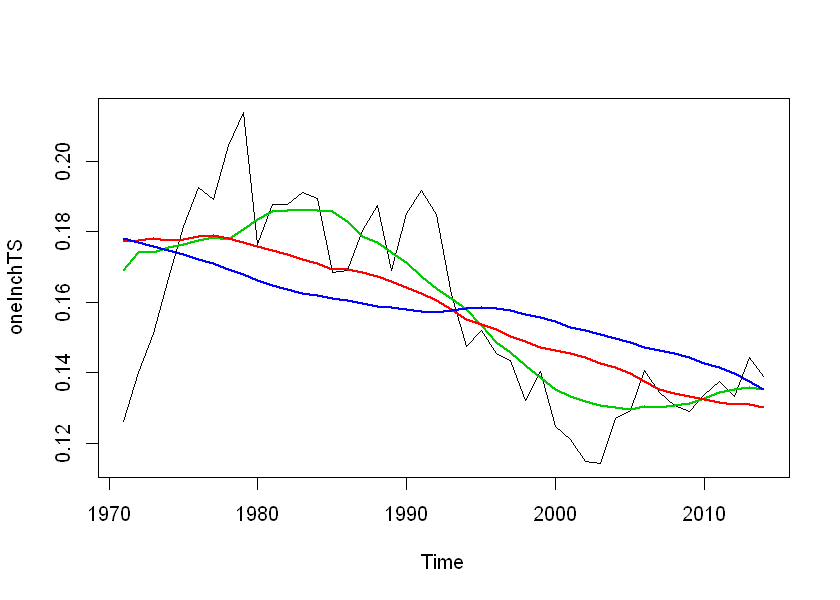

In [107]:
plot(oneInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)

In [108]:
rollSmall = ts(runmean(twoInchTS,15),start=starter)
rollSmall2 = ts(runmean(twoInchTS,30),start=starter)
rollSmall3 = ts(runmean(twoInchTS,50),start=starter)

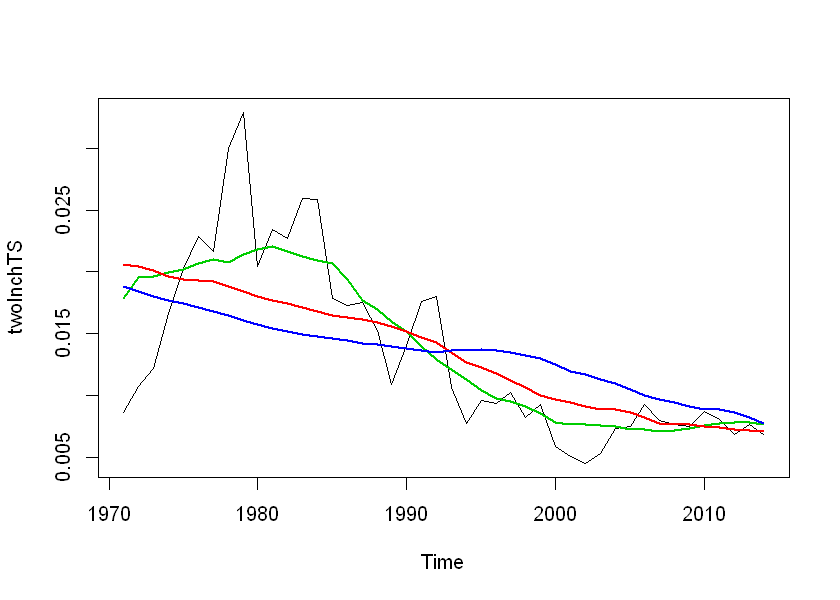

In [109]:
plot(twoInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)

In [110]:
rollSmall = ts(runmean(threeInchTS,15),start=starter)
rollSmall2 = ts(runmean(threeInchTS,30),start=starter)
rollSmall3 = ts(runmean(threeInchTS,50),start=starter)

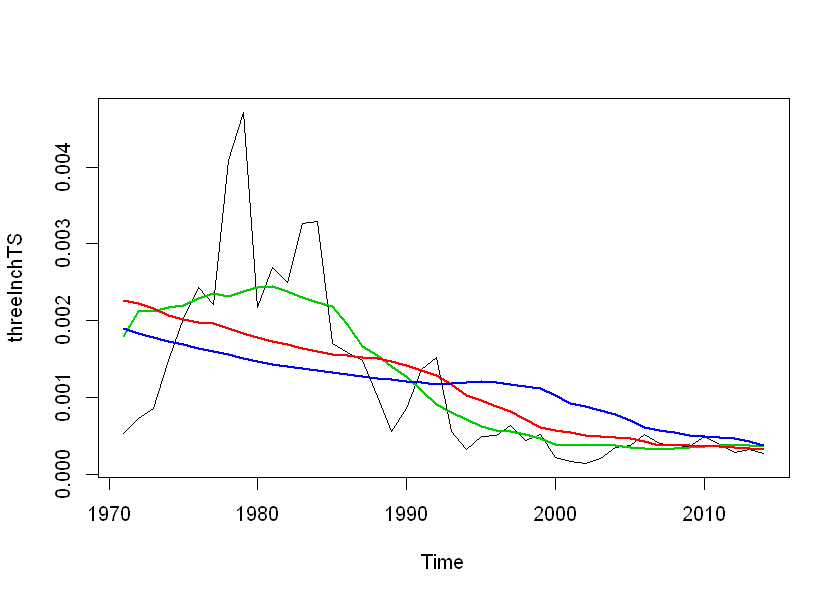

In [111]:
plot(threeInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)